In [4]:
!pip install -q yfinance

     |████████████████████████████████| 6.3MB 30.9MB/s 


In [5]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [79]:
prices = yf.download('WEGE3.SA' , start='1994-12-29')

[*********************100%***********************]  1 of 1 completed


In [80]:
prices

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.168639,0.170118,0.168639,0.168639,0.126868,378560.0
2000-01-04,0.164201,0.164201,0.162721,0.162721,0.122416,47320.0
2000-01-05,0.162721,0.162721,0.162721,0.162721,0.122416,0.0
2000-01-06,0.147928,0.147928,0.147928,0.147928,0.111287,250120.0
2000-01-07,0.149408,0.149408,0.147928,0.147928,0.111287,135200.0
...,...,...,...,...,...,...
2021-05-11,31.930000,32.400002,31.629999,32.290001,32.290001,9278900.0
2021-05-12,31.870001,32.160000,31.270000,31.270000,31.270000,7253300.0
2021-05-13,31.490000,32.259998,31.420000,31.799999,31.799999,7248800.0


### Calculando o Retorno

Sendo $r_t$ e $P_t$ o **retorno simples** e o **preço** no tempo $t$:

$$ r_{t} \equiv \frac{P_{t}-P_{t-1}}{P_{t-1}} = \frac{P_{t}}{P_{t-1}} - 1 $$


In [88]:
# Entendendo o deslocamento com shift()
df = pd.DataFrame()
df['price'] = prices['Adj Close'] 
df['price_shift_1'] = prices['Adj Close'].shift(1)
df.head()

,price,price_shift_1
Date,,
2000-01-03,0.126868,NaN
2000-01-04,0.122416,0.126868
2000-01-05,0.122416,0.122416
2000-01-06,0.111287,0.122416
2000-01-07,0.111287,0.111287


In [89]:
# Calculando o retorno usando shift()
retorno_diario = (prices['Adj Close'] / prices['Adj Close'].shift(1) - 1).dropna()

In [90]:
retorno_diario

Date
2000-01-04   -0.035092
2000-01-05    0.000000
2000-01-06   -0.090911
2000-01-07    0.000000
2000-01-10    0.000000
                ...   
2021-05-11   -0.000619
2021-05-12   -0.031589
2021-05-13    0.016949
2021-05-14    0.009434
2021-05-17   -0.003738
Name: Adj Close, Length: 5366, dtype: float64

In [91]:
# Calculando o retorno usando pct_change()
retorno_diario = prices['Adj Close'].pct_change()

In [92]:
retorno_diario

Date
2000-01-03         NaN
2000-01-04   -0.035092
2000-01-05    0.000000
2000-01-06   -0.090911
2000-01-07    0.000000
                ...   
2021-05-11   -0.000619
2021-05-12   -0.031589
2021-05-13    0.016949
2021-05-14    0.009434
2021-05-17   -0.003738
Name: Adj Close, Length: 5369, dtype: float64

O **retorno logarítmico** é dado por:

$ R_t\equiv ln\bigg( \frac{P_t}{P_{t-1}}\bigg)$ 

In [93]:
retorno_diario_log = np.log(prices['Adj Close'] / prices['Adj Close'].shift(1)).dropna()

In [94]:
retorno_diario_log

Date
2000-01-04   -0.035723
2000-01-05    0.000000
2000-01-06   -0.095312
2000-01-07    0.000000
2000-01-10    0.000000
                ...   
2021-05-11   -0.000619
2021-05-12   -0.032098
2021-05-13    0.016807
2021-05-14    0.009390
2021-05-17   -0.003745
Name: Adj Close, Length: 5366, dtype: float64

### Retorno mensal

In [95]:
retorno_mensal = prices['Adj Close'].resample('M', kind='period').last().pct_change().dropna().to_frame()

In [96]:
retorno_mensal

,Adj Close
Date,
2000-02,-0.090911
2000-03,0.000000
2000-04,0.000000
2000-05,-0.049997
2000-06,0.000000
...,...
2021-01,0.106285
2021-02,-0.068504
2021-03,-0.039974


In [97]:
retorno_mensal['mês'] = retorno_mensal.index.month
retorno_mensal['ano'] = retorno_mensal.index.year 

In [98]:
tab_retorno_mensal = retorno_mensal.pivot(values='Adj Close', columns='mês', index='ano' )

In [99]:
tab_retorno_mensal

mês,1,2,3,4,5,6,7,8,9,10,11,12
ano,,,,,,,,,,,,
2000,NaN,-0.090911,0.000000,0.000000,-0.049997,0.000000,0.000000,0.189472,0.044252,0.000000,0.000000,0.000000
2001,0.000000,0.000000,0.186438,0.135717,-0.044025,0.000000,0.000000,0.184211,-0.055556,0.000000,0.147058,0.000000
2002,0.000000,0.000000,0.000000,0.128204,-0.045455,-0.047620,0.000000,-0.024998,0.000000,0.015385,0.191920,0.000000
2003,0.114407,0.000000,0.000000,0.026616,0.092592,0.000000,0.000000,0.000000,0.322035,0.000000,0.000000,0.282050
2004,0.042001,0.000000,-0.007679,0.000000,0.000000,0.315282,0.001470,0.000000,0.013216,0.101449,0.006578,0.000000
2005,0.000000,0.019609,0.000000,0.000000,0.000000,-0.038461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2006,0.000000,0.000000,0.086666,0.001227,-0.019608,0.000000,0.250000,-0.099000,-0.001110,0.222222,0.054546,0.120690
2007,0.384616,-0.055556,0.058824,-0.027778,0.000000,0.034285,0.142541,0.006287,0.061989,0.150227,-0.050748,0.044343
2008,-0.160714,0.081798,-0.138461,0.019898,0.065533,-0.054930,-0.097903,-0.005556,-0.205241,-0.133192,-0.065041,0.090728


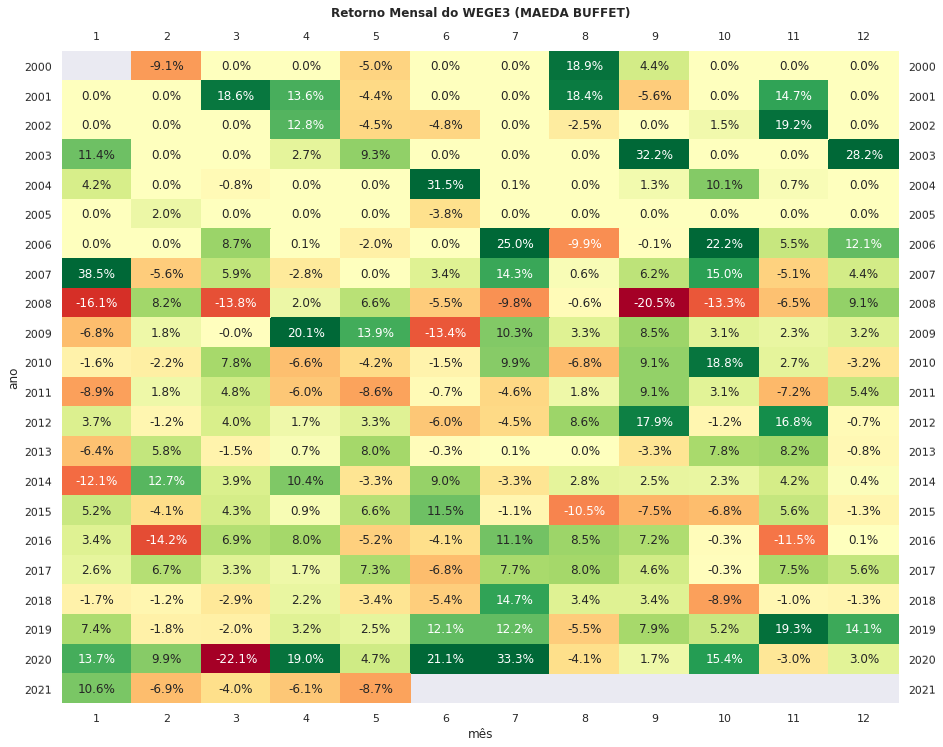

In [101]:
#@title
plt.figure(figsize=(15,12))
sns.set(font_scale=1.0)

ax = sns.heatmap(tab_retorno_mensal, 
                 annot  = True, 
                 fmt    = ".1%", 
                 cmap   = "RdYlGn", 
                 vmin   = -0.2, 
                 vmax   = 0.2, 
                 center = 0, 
                 cbar=False)

ax.set_title('Retorno Mensal do WEGE3 (MAEDA BUFFET)', pad=15, fontdict={'fontsize':12, 'fontweight':600})
ax.tick_params(axis = "y", labelright =True, labelrotation=.90 )
ax.tick_params(axis = "x", labeltop=True)

### Retorno trimestral

In [102]:
### https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects
 
retorno_trimestre = prices['Adj Close'].resample('Q', kind='period').last().pct_change().dropna().to_frame()

In [103]:
retorno_trimestre

,Adj Close
Date,
2000Q2,-0.049997
2000Q3,0.242109
2000Q4,0.000000
2001Q1,0.186438
2001Q2,0.085717
...,...
2020Q2,0.508750
2020Q3,0.301333
2020Q4,0.153400


In [104]:
retorno_trimestre['trimestre'] = retorno_trimestre.index.quarter
retorno_trimestre['ano'] = retorno_trimestre.index.year

In [105]:
tab_retorno_trimestre = retorno_trimestre.pivot(values='Adj Close', columns='trimestre', index='ano')

In [106]:
tab_retorno_trimestre

trimestre,1,2,3,4
ano,,,,
2000,NaN,-0.049997,0.242109,0.000000
2001,0.186438,0.085717,0.118420,0.147058
2002,0.000000,0.025639,-0.024998,0.210258
2003,0.114407,0.121673,0.322035,0.282050
2004,0.034000,0.315282,0.014706,0.108694
2005,0.019609,-0.038461,0.000000,0.000000
2006,0.086666,-0.018405,0.125000,0.444444
2007,0.384616,0.005555,0.220994,0.140272
2008,-0.217777,0.027041,-0.287033,-0.116042


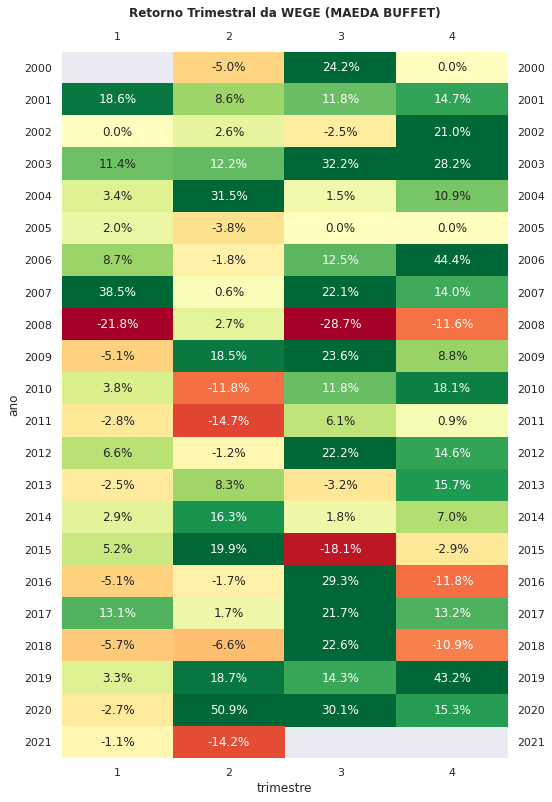

In [108]:
#@title
plt.figure(figsize=(8,13))
sns.set(font_scale=1)

ax = sns.heatmap(tab_retorno_trimestre, 
                 annot  = True, 
                 fmt    = ".1%", 
                 cmap   = "RdYlGn", 
                 vmin   = -0.2, 
                 vmax   = 0.2, 
                 center = 0, 
                 cbar=False)

ax.set_title('Retorno Trimestral da WEGE (MAEDA BUFFET)WEGE ', pad=15, fontdict={'fontsize':12, 'fontweight':600})
ax.tick_params(axis = "y", labelright =True, labelrotation=0)
ax.tick_params(axis = "x", labeltop=True)

### Retorno Anual - Janelas de Retorno

In [110]:
retorno_anual = prices['Adj Close'].resample('A', kind='period').last().to_frame()

In [111]:
retorno_anual['retorno'] = np.log(retorno_anual['Adj Close']/retorno_anual['Adj Close'].shift(1))

In [112]:
retorno_anual.dropna(inplace=True)
retorno_anual

,Adj Close,retorno
Date,,
2001,0.217010,0.502314
2002,0.262638,0.190833
2003,0.556437,0.750776
2004,0.851349,0.425268
2005,0.834656,-0.019802
2006,1.446737,0.550046
2007,2.804445,0.661895
2008,1.419929,-0.680599
2009,2.146971,0.413451


In [121]:
tab_retorno_anual = pd.DataFrame()

for ano in range(retorno_anual.index.size, 0, -1):
    tab_retorno_anual[f"{ano}A"] = retorno_anual['retorno'].rolling(ano).mean()

In [122]:
tab_retorno_anual


,21A,20A,19A,18A,17A,16A,15A,14A,13A,12A,11A,10A,9A,8A,7A,6A,5A,4A,3A,2A,1A
Date,,,,,,,,,,,,,,,,,,,,,
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.502314
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.346574,0.190833
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.481308,0.470805,0.750776
2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.467298,0.455626,0.588022,0.425268
2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.369878,0.336769,0.385414,0.202733,-0.019802
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.399906,0.379424,0.426572,0.318504,0.265122,0.550046
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.437333,0.426503,0.473637,0.404352,0.397380,0.605970,0.661895
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.297591,0.268345,0.281264,0.187362,0.127885,0.177114,-0.009352,-0.680599
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.310465,0.286484,0.300148,0.225043,0.184998,0.236198,0.131582,-0.133574,0.413451


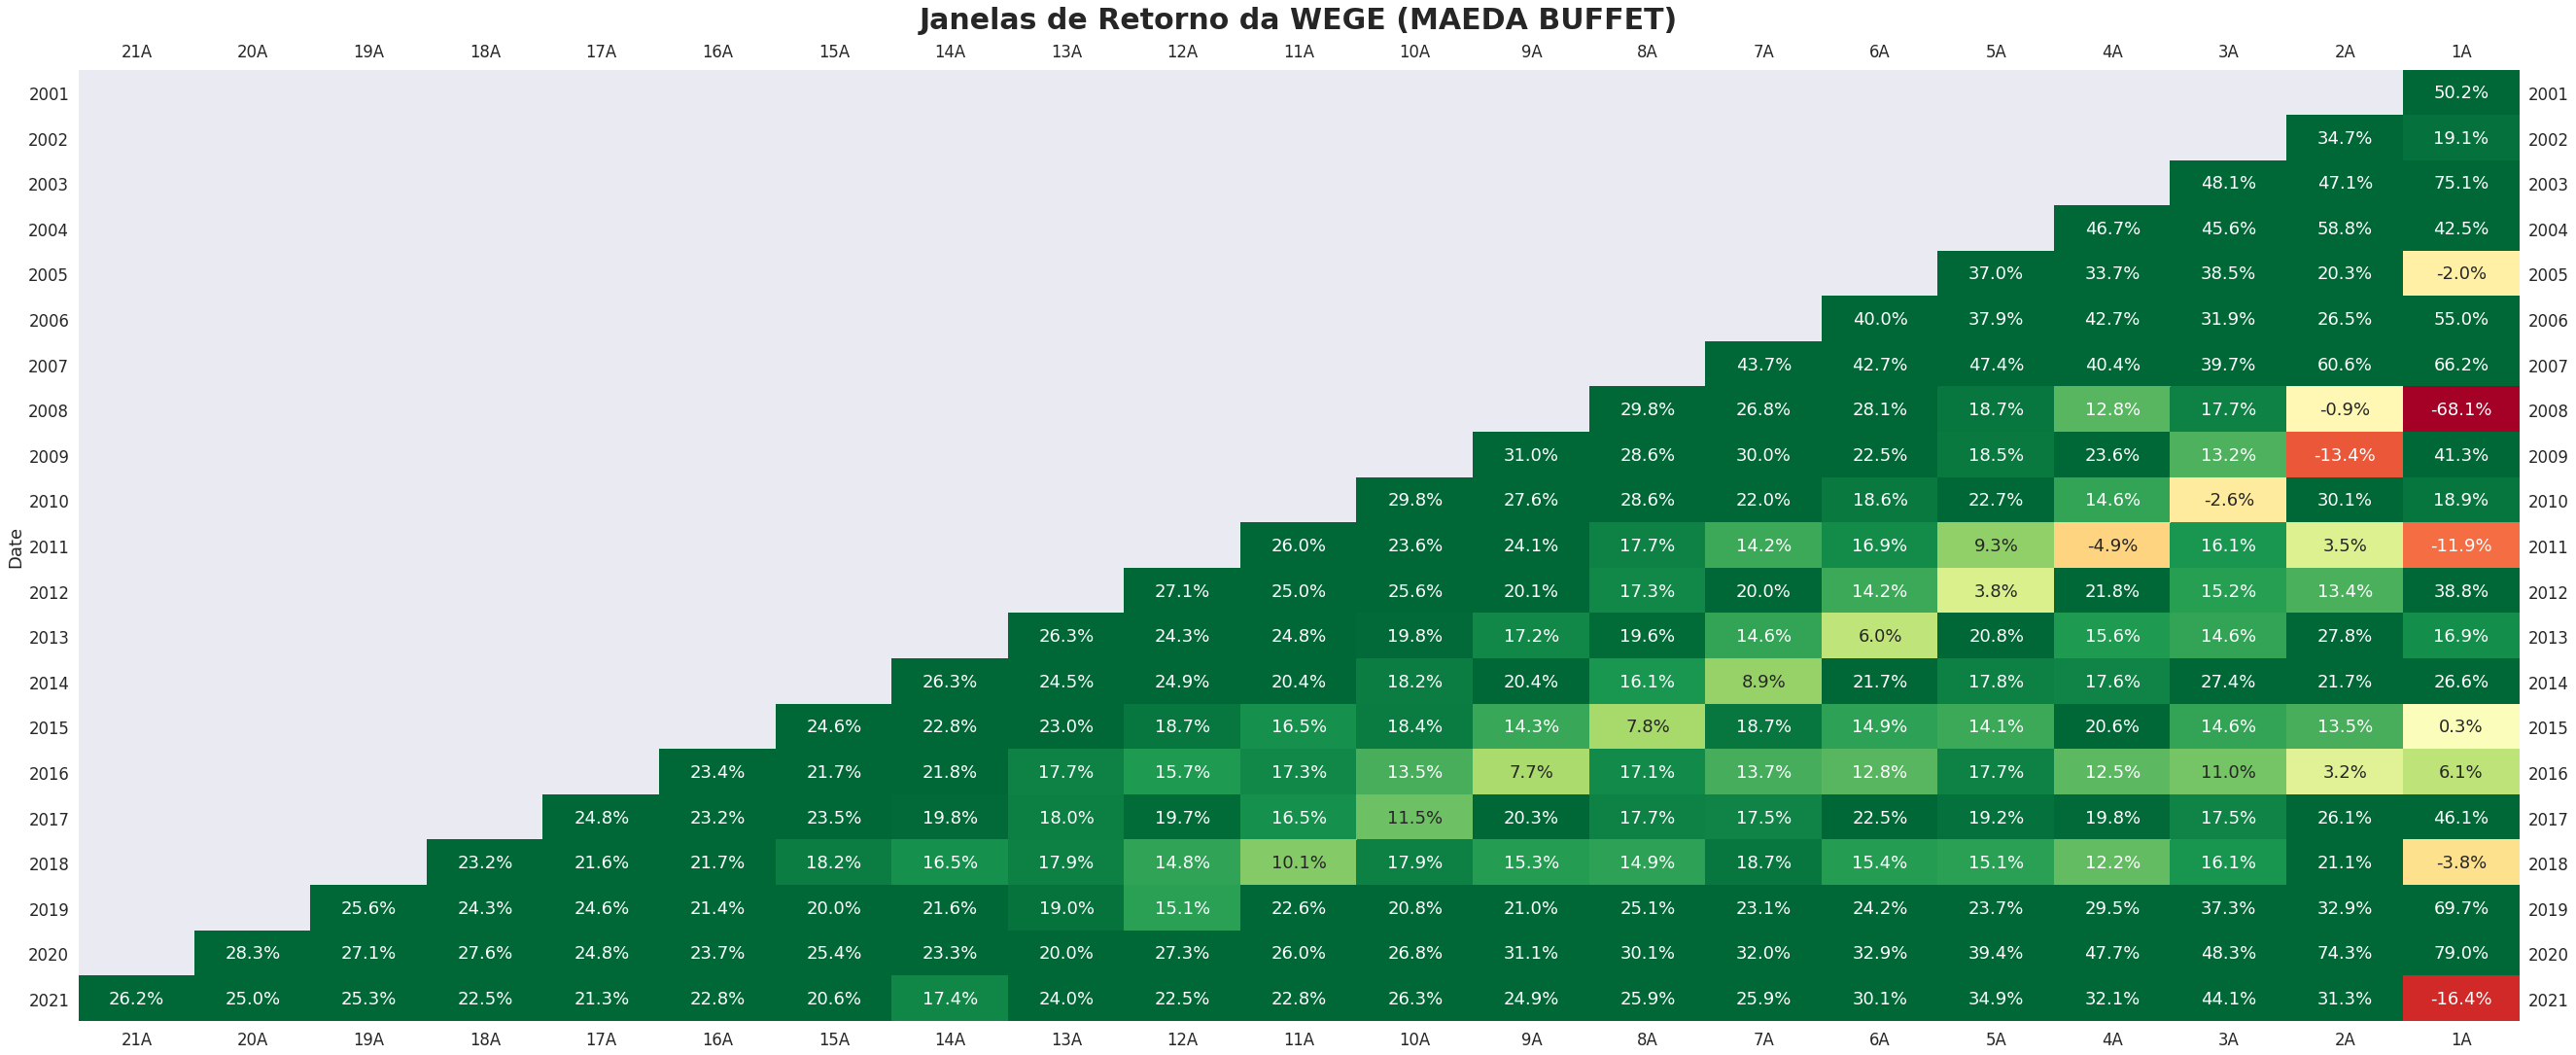

In [128]:
#@title
plt.figure(figsize=(45,18))
sns.set(font_scale=1.5)

ax = sns.heatmap(tab_retorno_anual, 
                 annot  = True, 
                 fmt    = ".1%", 
                 cmap   = "RdYlGn", 
                 vmin   = -0.2, 
                 vmax   = 0.2, 
                 center = 0, 
                 cbar=False)

ax.set_title('Janelas de Retorno da WEGE (MAEDA BUFFET)', pad=15, fontdict={'fontsize':30, 'fontweight':600})
ax.tick_params(axis = "y", labelright =True, labelrotation=0 )
ax.tick_params(axis = "x", labeltop=True)

### **Como calcular o retorno acumulado**

1a) Qual o retorno em 2021 de quem investiu no primeiro dia de 2008?

In [159]:
print(f'retorno acumulado: {np.exp(14*0.174) - 1:.1%}')

retorno acumulado: 1042.7%


1b) Quanto teria hoje se tivesse investido R$10 mil?

In [158]:
result2008 = (f'saldo final: R$ {10000 * np.exp(14*0.174):_.2f}')
result2008 = result2008.replace('.',',').replace('_','.')
result2008


'saldo final: R$ 114.272,40'

2a) Qual o retorno em 2021 de quem investiu na primeiro dia de 2009?

In [152]:
print(f'{np.exp(13*0.24) - 1:.1%}')

2164.6%


2b) Quanto teria hoje se tivesse investido R$10 mil?

In [160]:
result2009 = (f'saldo final: R$ {10000 * np.exp(13*0.24):_.2f}')
result2009 = result2009.replace('.',',').replace('_','.')
result2009

'saldo final: R$ 226.463,80'

In [ ]:
#@title
tab_retorno_reais = pd.DataFrame()

for ano in range(retorno_anual.index.size, 0, -1):
    tab_retorno_reais[f"{ano}A"] = 100 * np.exp(ano * retorno_anual['retorno'].rolling(ano).mean())
tab_retorno_reais

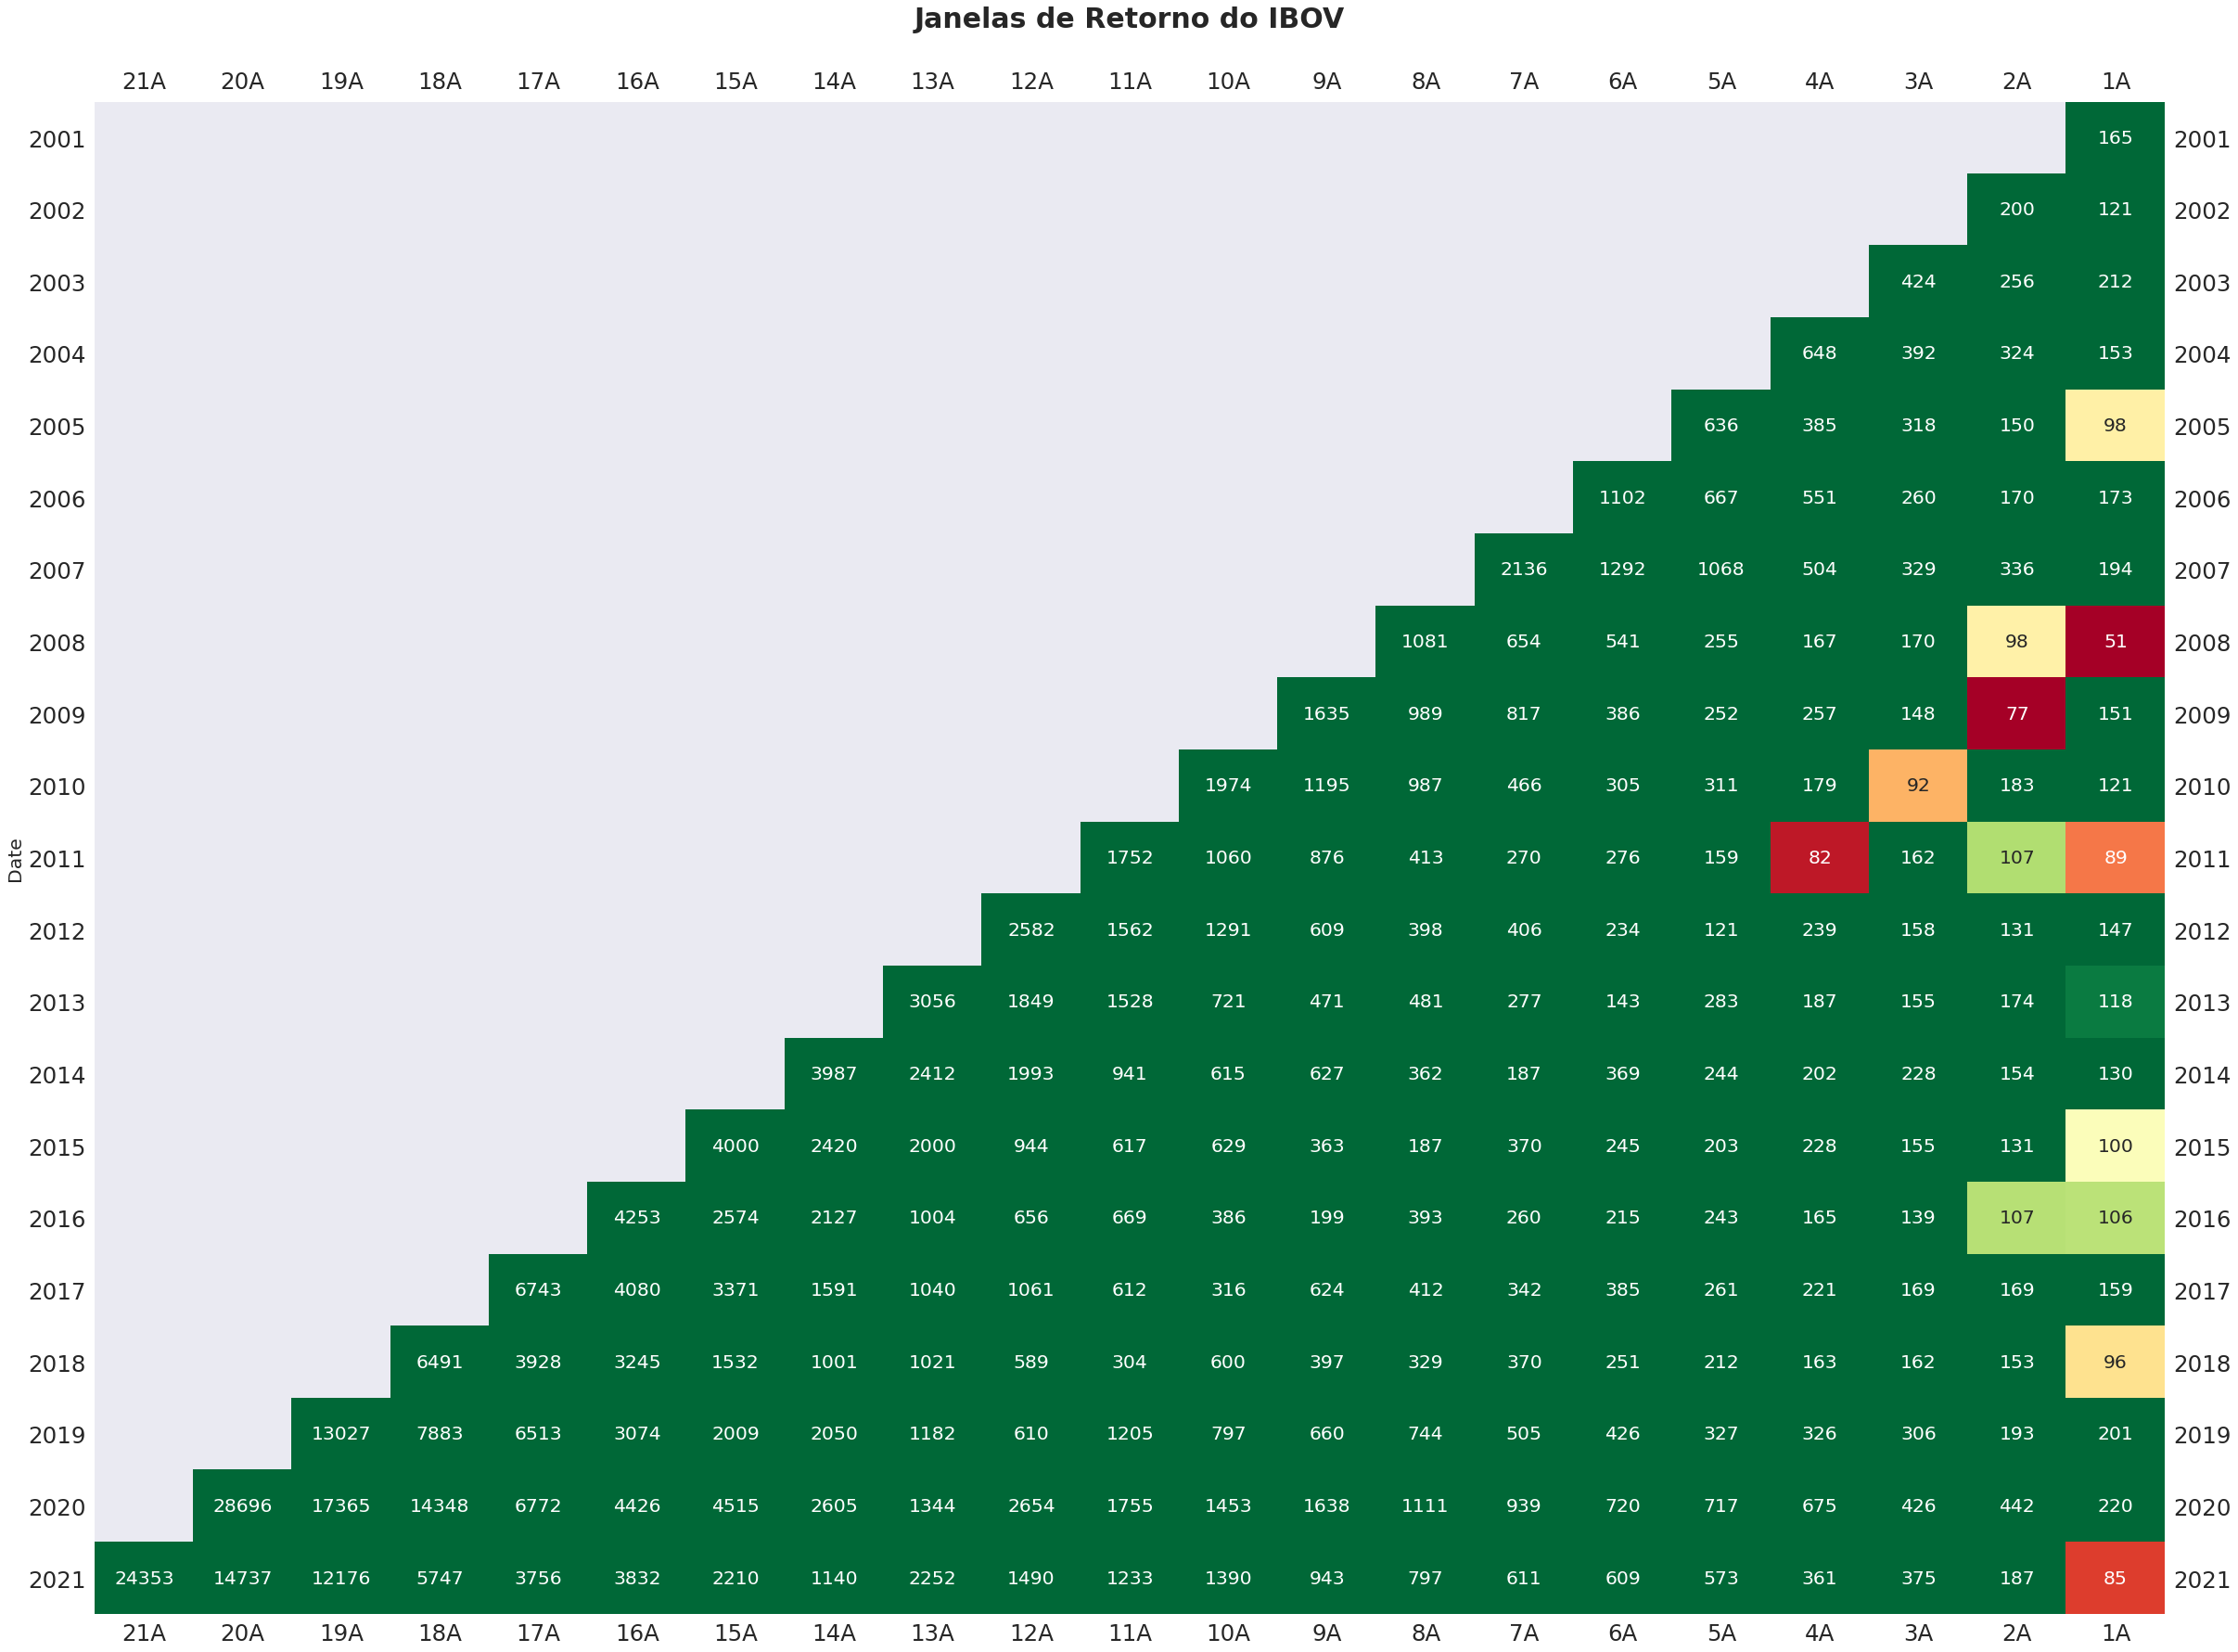

In [172]:
#@title Gráfico
plt.figure(figsize=(40,30))
sns.set(font_scale=1.7)

ax = sns.heatmap(tab_retorno_reais, 
                 annot  = True, 
                 fmt    = ".0f", 
                 cmap   = "RdYlGn", 
                 vmin   = 80, 
                 vmax   = 120, 
                 center = 100, 
                 cbar=False)

ax.set_title('Janelas de Retorno do IBOV', pad=80, fontdict={'fontsize':30, 'fontweight':600})
ax.tick_params(axis = "y", labelright =True, labelrotation=0, labelsize='large' )
ax.tick_params(axis = "x", labeltop=True,  labelsize='large' )

In [171]:
#@title Retornos
retorno_neg = tab_retorno_reais[tab_retorno_reais < 100].count()
retorno_pos = tab_retorno_reais[tab_retorno_reais >= 100].count()

total_de_janelas = tab_retorno_reais.count()
pd.concat([-retorno_neg, retorno_pos], 
          axis=1, 
          keys=['Retorno Negativo','Retorno Positivo'])\
          .style.bar(align='mid', color=['#d65f5f', '#5fba7d'])

,Retorno Negativo,Retorno Positivo
21A,0,1
20A,0,2
19A,0,3
18A,0,4
17A,0,5
16A,0,6
15A,0,7
14A,0,8
13A,0,9
12A,0,10
